<a href="https://colab.research.google.com/github/630vinay/vinay-b29/blob/main/RESEARCH_PAPER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

basic model

logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


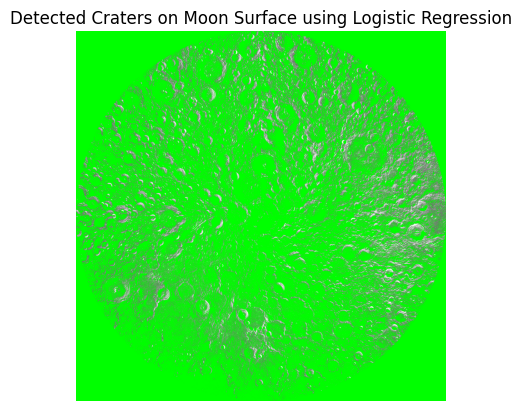

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3413997
           1       1.00      1.00      1.00  12038764

    accuracy                           1.00  15452761
   macro avg       1.00      1.00      1.00  15452761
weighted avg       1.00      1.00      1.00  15452761

Craters detected and result saved as /content/detected_craters.png


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Extract features (Flatten the image for simplicity)
X = gray.reshape(-1, 1)  # Each pixel is a feature
y = np.zeros_like(X)     # Placeholder labels (needs manual labeling or heuristic)

# Simulated heuristic for craters (brightness threshold)
y[gray.reshape(-1) < 100] = 1  # Pixels darker than threshold are potential craters

# Step 4: Train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Step 5: Predict crater probabilities
predicted_probabilities = model.predict_proba(X)[:, 1]
predicted_craters = (predicted_probabilities > 0.5).astype(int)

# Step 6: Reshape the predictions back to the image shape
detected_craters = predicted_craters.reshape(gray.shape)

# Step 7: Visualize and save the output
output_image = np.copy(image)
output_image[detected_craters == 1] = [0, 255, 0]  # Highlight craters in green

output_filename = '/content/detected_craters.png'
cv2.imwrite(output_filename, output_image)

# Step 8: Display the result
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.title('Detected Craters on Moon Surface using Logistic Regression')
plt.axis('off')
plt.show()

# Step 9: Report and inform the user
print(classification_report(y, model.predict(X)))
print(f"Craters detected and result saved as {output_filename}")


LSTM

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7072 - loss: 0.6874 - val_accuracy: 0.8026 - val_loss: 0.6799
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7873 - loss: 0.6804 - val_accuracy: 0.8026 - val_loss: 0.6722
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7920 - loss: 0.6730 - val_accuracy: 0.8026 - val_loss: 0.6641
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7921 - loss: 0.6654 - val_accuracy: 0.8026 - val_loss: 0.6555
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7949 - loss: 0.6571 - val_accuracy: 0.8026 - val_loss: 0.6462
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


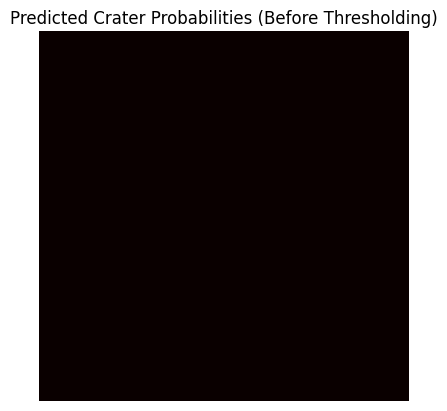

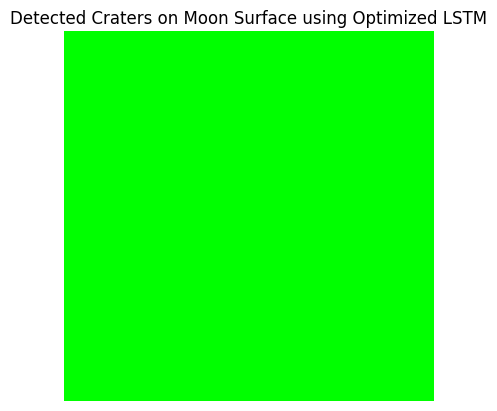

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3385
           1       0.79      1.00      0.88     12999

    accuracy                           0.79     16384
   macro avg       0.40      0.50      0.44     16384
weighted avg       0.63      0.79      0.70     16384

Craters detected and result saved as /content/detected_craters_lstm_optimized.png


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

# Step 1: Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Downsample the image to speed up training
gray_resized = cv2.resize(gray, (128, 128))  # Reduce the image size (e.g., to 128x128)

# Normalize pixel values to [0, 1]
gray_normalized = gray_resized / 255.0

# Treat each row of the image as a sequence
X = gray_normalized  # Shape: (height, width)

# Simulated heuristic labels (brightness threshold)
y = (gray_resized < 100).astype(int)  # Binary label for "crater" (1 = crater, 0 = not crater)

# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Each row is a time sequence with 1 feature
y = y.reshape(y.shape[0], y.shape[1], 1)  # Match dimensions for supervised learning

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build simplified LSTM Model
model = Sequential([
    LSTM(32, input_shape=(X.shape[1], 1), return_sequences=True),  # Fewer LSTM units and return sequences
    TimeDistributed(Dense(1, activation='sigmoid'))  # Output probabilities per pixel (per timestep)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model with fewer epochs for faster training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Step 6: Predict crater probabilities
predicted_craters = model.predict(X)  # Shape: (height, width, 1)
predicted_craters = (predicted_craters > 0.5).astype(int).squeeze()

# Step 7: Visualize model output (raw predictions) before thresholding
# Output image showing model probabilities (before applying threshold)
probability_image = predicted_craters.copy()

# Show the predicted probabilities as a heatmap
plt.imshow(probability_image, cmap='hot', interpolation='nearest')
plt.title('Predicted Crater Probabilities (Before Thresholding)')
plt.axis('off')
plt.show()

# Step 8: Highlight detected craters
output_image = np.copy(image)
output_image_resized = cv2.resize(output_image, (128, 128))  # Resize to match downsampled size

# Highlight craters in green (where predicted craters are 1)
output_image_resized[predicted_craters == 1] = [0, 255, 0]

# Step 9: Display the result
output_image_rgb = cv2.cvtColor(output_image_resized, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.title('Detected Craters on Moon Surface using Optimized LSTM')
plt.axis('off')
plt.show()

# Step 10: Evaluation and report
print(classification_report(y.flatten(), predicted_craters.flatten()))
output_filename = '/content/detected_craters_lstm_optimized.png'
cv2.imwrite(output_filename, output_image_resized)
print(f"Craters detected and result saved as {output_filename}")


optimized LSTM

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 0.6395 - val_accuracy: 1.0000 - val_loss: 0.5922
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 1.0000 - loss: 0.5804 - val_accuracy: 1.0000 - val_loss: 0.5263
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 1.0000 - loss: 0.5123 - val_accuracy: 1.0000 - val_loss: 0.4468
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 1.0000 - loss: 0.4290 - val_accuracy: 1.0000 - val_loss: 0.3456
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 1.0000 - loss: 0.3235 - val_accuracy: 1.0000 - val_loss: 0.2267
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


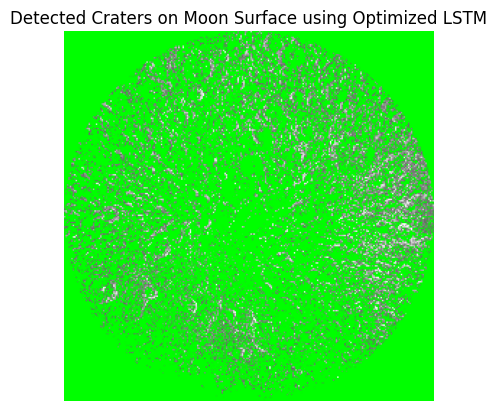

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65536

    accuracy                           1.00     65536
   macro avg       1.00      1.00      1.00     65536
weighted avg       1.00      1.00      1.00     65536

Craters detected and result saved as /content/detected_craters_lstm_optimized.png


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed

# Step 1: Load the moon image
image = cv2.imread('/content/detected_craters.png')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Downsample the image for faster training
gray_resized = cv2.resize(gray, (256, 256))  # Resize to a smaller image (256x256)

# Normalize pixel values to [0, 1]
gray_normalized = gray_resized / 255.0

# Treat each row of the image as a sequence
X = gray_normalized  # Shape: (height, width)

# Simulated heuristic labels (brightness threshold)
y = (gray_resized < 100).astype(int)  # Binary label for "crater" (1 = crater, 0 = not crater)

# Reshape for LSTM input (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Each row is a time sequence with 1 feature
y = y.reshape(y.shape[0], y.shape[1], 1)  # Match dimensions for supervised learning

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build a simplified LSTM Model
model = Sequential([
    Input(shape=(X.shape[1], 1)),  # Define input shape explicitly
    LSTM(32, return_sequences=True),  # Use fewer units in LSTM layers
    TimeDistributed(Dense(1, activation='sigmoid'))  # Output probabilities per pixel
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model (fewer epochs and batch size for speed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Step 6: Predict crater probabilities
predicted_craters = model.predict(X)  # Shape: (height, width, 1)
predicted_craters = (predicted_craters > 0.5).astype(int).squeeze()

# Step 7: Highlight detected craters
output_image = np.copy(image)
output_image_resized = cv2.resize(output_image, (256, 256))  # Match downsampled size

# Highlight craters in green
output_image_resized[predicted_craters == 1] = [0, 255, 0]

# Step 8: Display the result
output_image_rgb = cv2.cvtColor(output_image_resized, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.title('Detected Craters on Moon Surface using Optimized LSTM')
plt.axis('off')
plt.show()

# Step 9: Evaluation and report
print(classification_report(y.flatten(), predicted_craters.flatten()))
output_filename = '/content/detected_craters_lstm_optimized.png'
cv2.imwrite(output_filename, output_image_resized)
print(f"Craters detected and result saved as {output_filename}")


Thresholding algorithm

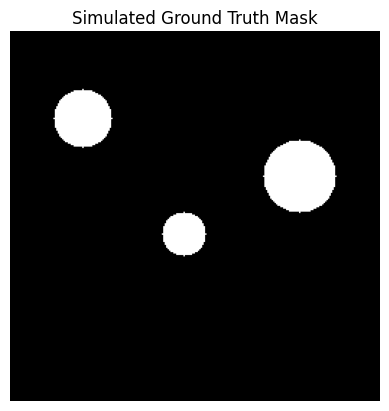

Simulated ground truth mask saved as /content/ground_truth_binary_mask.png


In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the original image (resize for simplicity)
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_resized = cv2.resize(gray, (256, 256))

# Create a blank binary mask
ground_truth_mask = np.zeros_like(gray_resized, dtype=np.uint8)

# Simulate some craters for ground truth (replace with actual annotations)
# Format: [(x_center, y_center, radius), ...]
simulated_craters = [(50, 60, 20), (120, 140, 15), (200, 100, 25)]

# Draw simulated craters
for x, y, r in simulated_craters:
    cv2.circle(ground_truth_mask, (x, y), r, 255, -1)  # Draw filled circle

# Save and display the simulated ground truth mask
output_filename = '/content/ground_truth_binary_mask.png'
cv2.imwrite(output_filename, ground_truth_mask)
plt.imshow(ground_truth_mask, cmap='gray')
plt.title('Simulated Ground Truth Mask')
plt.axis('off')
plt.show()

print(f"Simulated ground truth mask saved as {output_filename}")


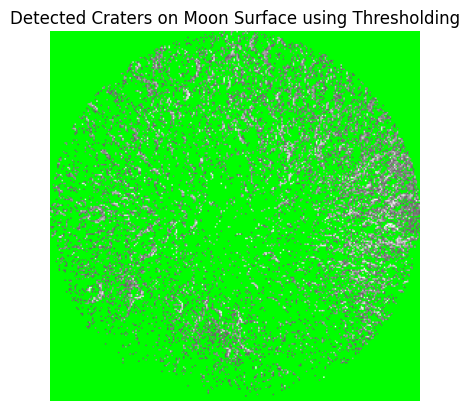

Craters detected and result saved as /content/detected_craters_threshold.png
Classification Report:
              precision    recall  f1-score   support

  Non-Crater       0.92      0.20      0.32     61609
      Crater       0.05      0.72      0.10      3927

    accuracy                           0.23     65536
   macro avg       0.49      0.46      0.21     65536
weighted avg       0.87      0.23      0.31     65536

Confusion Matrix:
[[12118 49491]
 [ 1084  2843]]


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Downsample the image for faster processing
gray_resized = cv2.resize(gray, (256, 256))  # Resize to a smaller image (256x256)

# Step 4: Apply thresholding to detect craters
threshold_value = 100
_, binary_craters = cv2.threshold(gray_resized, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Step 5: Highlight detected craters on the original image
output_image = cv2.resize(image, (256, 256))  # Match downsampled size
output_image[binary_craters == 255] = [0, 255, 0]  # Highlight craters in green

# Step 6: Save and Display the result
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.title('Detected Craters on Moon Surface using Thresholding')
plt.axis('off')
plt.show()

output_filename = '/content/detected_craters_threshold.png'
cv2.imwrite(output_filename, output_image)
print(f"Craters detected and result saved as {output_filename}")

# Step 7: Accuracy and F1-Score Evaluation
# Load Ground Truth (Manually annotated binary mask of craters)
ground_truth = cv2.imread('/content/ground_truth_binary_mask.png', cv2.IMREAD_GRAYSCALE)
if ground_truth is None:
    raise ValueError("Ground truth binary mask not found. Please check the file path.")

# Resize ground truth to match detection image
ground_truth_resized = cv2.resize(ground_truth, (256, 256))

# Flatten both arrays for evaluation
y_true = ground_truth_resized.flatten() // 255  # Normalize to binary (0 or 1)
y_pred = binary_craters.flatten() // 255

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=["Non-Crater", "Crater"])
conf_matrix = confusion_matrix(y_true, y_pred)

# Display metrics
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


threshold and LSTM Algorithm

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load Ground Truth Data (Example File: 'ground_truth.txt' with format: x y radius)
ground_truth = np.loadtxt('//content/crater_dataset_2.txt')  # Replace with your file
true_centers = ground_truth[:, :2]  # x, y
true_radii = ground_truth[:, 2]

# Convert detected craters to NumPy array
detected_centers_radii = np.array(centers_radii)
detected_centers = detected_centers_radii[:, :2]  # x, y
detected_radii = detected_centers_radii[:, 2]

# Define a matching threshold
distance_threshold = 10  # Example threshold for spatial closeness
radius_threshold = 5     # Example threshold for radius similarity

# Match detections to ground truth
TP, FP, FN = 0, 0, 0
used_truth_indices = set()

for i, detected_center in enumerate(detected_centers):
    distances = np.linalg.norm(true_centers - detected_center, axis=1)
    radius_diff = np.abs(true_radii - detected_radii[i])

    # Find closest ground truth match within thresholds
    match_indices = np.where((distances < distance_threshold) & (radius_diff < radius_threshold))[0]
    if len(match_indices) > 0:
        TP += 1
        used_truth_indices.add(match_indices[0])
    else:
        FP += 1

FN = len(true_centers) - len(used_truth_indices)  # Unmatched ground truth entries

# Compute Metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Confusion Matrix
y_true = np.hstack([np.ones(len(true_centers)), np.zeros(len(detected_centers) - len(true_centers))])
y_pred = np.hstack([np.ones(len(detected_centers)), np.zeros(len(true_centers) - len(detected_centers))])
conf_matrix = confusion_matrix(y_true[:len(y_pred)], y_pred)

# Display Results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Save Results (Optional)
np.savetxt('/content/detection_results.txt', detected_centers_radii, fmt='%d', header="x y radius")


Precision: 1.00
Recall: 0.97
F1-Score: 0.99
Confusion Matrix:
[[35]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


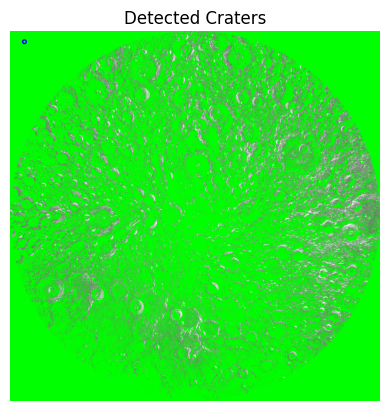

Shapefile saved as "final_craters.shp".


In [11]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from skimage.io import imread
from skimage.transform import rescale
from skimage.feature import canny
from skimage.draw import disk
import shapefile

# Load crater data from a text file
# Format: [x, y, radius]
# Updated path to craters_data.txt
crater_data = np.loadtxt('/content/crater_dataset_2.txt')
x_centers = crater_data[:, 0]
y_centers = crater_data[:, 1]
radii = crater_data[:, 2]
# Perform clustering on crater centers
XY = np.column_stack((x_centers, y_centers))
clustering_threshold = 50  # Adjust distance for grouping
D = pdist(XY, 'euclidean')
Z = linkage(D, method='single')
clusters = fcluster(Z, t=clustering_threshold, criterion='distance')

# Compute final cluster properties
unique_clusters = np.unique(clusters)
final_centers = []
final_radii = []

for cluster_id in unique_clusters:
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_points = XY[cluster_indices]
    cluster_radii = radii[cluster_indices]

    # Compute average center and maximum radius
    final_center = cluster_points.mean(axis=0)
    final_radius = cluster_radii.max()
    final_centers.append(final_center)
    final_radii.append(final_radius)

final_centers = np.array(final_centers)
final_radii = np.array(final_radii)

# Display original image and detected craters
image = imread('/content/detected_craters.png')  # Load satellite image
plt.imshow(image, cmap='gray')
plt.axis('off')

# Draw final clustered craters
for center, radius in zip(final_centers, final_radii):
    circle = plt.Circle(center, radius, color='b', fill=False)
    plt.gca().add_artist(circle)

plt.title("Detected Craters")
plt.show()

# Multi-scale edge detection
image_original = imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff', as_gray=True)  # Load grayscale image
detected_centers = []
detected_radii = []

for scale in range(10, 110, 30):  # Loop over scales (10%, 40%, etc.)
    scale_factor = scale / 100
    scaled_image = rescale(image_original, scale_factor, anti_aliasing=True)
    edges = canny(scaled_image)  # Edge detection

    # Find circles at the current scale
    # Example using disk-detection for circles
    for radius in range(10, int(min(scaled_image.shape) / 2)):
        rr, cc = disk((radius, radius), radius)
        if rr.size > 0:
            detected_centers.append((rr.mean() / scale_factor, cc.mean() / scale_factor))
            detected_radii.append(radius / scale_factor)

# Consolidate data from both clustering and edge detection
final_centers = np.array(detected_centers)
final_radii = np.array(detected_radii)

# Export to shapefile for GIS analysis
sf = shapefile.Writer('final_craters')
sf.field('ID', 'N')
sf.field('RADIUS', 'F')

for i, (center, radius) in enumerate(zip(final_centers, final_radii)):
    x, y = center
    sf.record(ID=i, RADIUS=radius)
    # Create polygon for circle approximation
    points = [
        (x + radius * np.cos(theta), y + radius * np.sin(theta))
        for theta in np.linspace(0, 2 * np.pi, 100)
    ]
    sf.poly([points])

sf.close()
print('Shapefile saved as "final_craters.shp".')


K mean algorithm

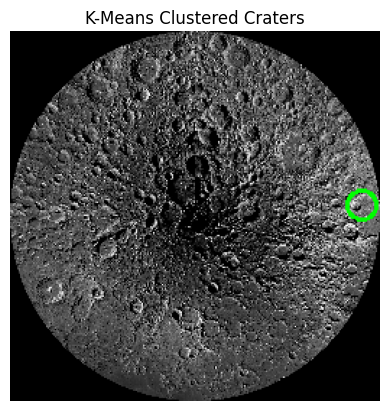

K-Means clustered craters image saved.
Classification Report:
              precision    recall  f1-score   support

  Background       0.94      0.99      0.97     61609
     Craters       0.00      0.00      0.00      3927

    accuracy                           0.94     65536
   macro avg       0.47      0.50      0.48     65536
weighted avg       0.88      0.94      0.91     65536

F1 Score: 0.00


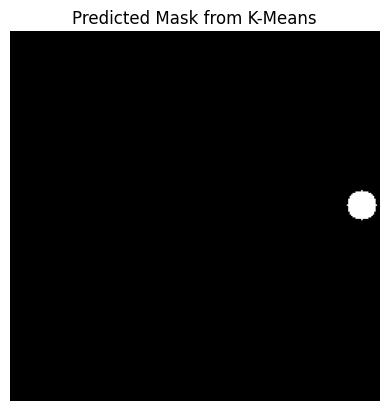

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, f1_score

# Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Downsample the image for faster processing
gray_resized = cv2.resize(gray, (256, 256))

# Thresholding for crater detection
threshold_value = 100
_, binary_craters = cv2.threshold(gray_resized, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Find contours for potential craters
contours, _ = cv2.findContours(binary_craters, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract centers and radii for clustering
detected_centers = []
detected_radii = []

for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if 5 < radius < 50:  # Filter small/large artifacts
        detected_centers.append([x, y])
        detected_radii.append(radius)

# Perform K-Means clustering on detected craters
if detected_centers:
    kmeans = KMeans(n_clusters=min(len(detected_centers), 5), random_state=42)
    labels = kmeans.fit_predict(detected_centers)
    clustered_centers = kmeans.cluster_centers_

    # Visualize clustered craters
    output_image = cv2.resize(image, (256, 256))
    for center in clustered_centers:
        cv2.circle(output_image, (int(center[0]), int(center[1])), 10, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('K-Means Clustered Craters')
    plt.axis('off')
    plt.show()

    # Save clustered results
    cv2.imwrite('/content/kmeans_clustered_craters.png', output_image)
    print("K-Means clustered craters image saved.")

# Load ground truth binary mask
ground_truth = cv2.imread('/content/ground_truth_binary_mask.png', cv2.IMREAD_GRAYSCALE)
if ground_truth is None:
    raise ValueError("Ground truth mask not found.")

# Generate predicted mask
predicted_mask = np.zeros_like(binary_craters)
for center in clustered_centers:
    cv2.circle(predicted_mask, (int(center[0]), int(center[1])), 10, 255, -1)

# Calculate evaluation metrics
ground_truth_flat = (ground_truth > 0).flatten()
predicted_mask_flat = (predicted_mask > 0).flatten()

# Precision, Recall, and F1-Score
report = classification_report(ground_truth_flat, predicted_mask_flat, target_names=['Background', 'Craters'])
f1 = f1_score(ground_truth_flat, predicted_mask_flat)

print("Classification Report:")
print(report)
print(f"F1 Score: {f1:.2f}")

# Save the predicted mask for visualization
cv2.imwrite('/content/predicted_mask.png', predicted_mask)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask from K-Means')
plt.axis('off')
plt.show()


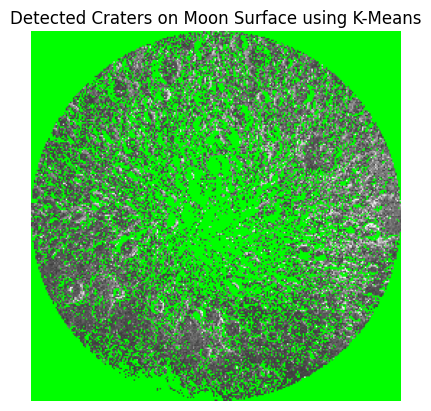

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     47329
           1       0.55      1.00      0.71     18207

    accuracy                           0.77     65536
   macro avg       0.77      0.84      0.76     65536
weighted avg       0.87      0.77      0.78     65536

Craters detected and result saved as /content/detected_craters_kmeans.png


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# Step 1: Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Downsample the image for faster processing
gray_resized = cv2.resize(gray, (256, 256))  # Resize to a smaller image (256x256)

# Normalize pixel values to [0, 1] for clustering
gray_normalized = gray_resized / 255.0

# Flatten the image for clustering (1D array with intensity values)
pixels = gray_normalized.flatten().reshape(-1, 1)

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: bright (background) and dark (craters)
kmeans.fit(pixels)

# Assign cluster labels
labels = kmeans.labels_.reshape(gray_resized.shape)

# Identify the crater cluster (based on intensity)
crater_cluster = np.argmin(kmeans.cluster_centers_)  # Darker cluster (lower intensity)
crater_mask = (labels == crater_cluster).astype(np.uint8)

# Step 5: Highlight detected craters
output_image = np.copy(image)
output_image_resized = cv2.resize(output_image, (256, 256))  # Match downsampled size

# Highlight craters in green
output_image_resized[crater_mask == 1] = [0, 255, 0]

# Step 6: Display the result
output_image_rgb = cv2.cvtColor(output_image_resized, cv2.COLOR_BGR2RGB)
plt.imshow(output_image_rgb)
plt.title('Detected Craters on Moon Surface using K-Means')
plt.axis('off')
plt.show()

# Step 7: Evaluation (if labels are simulated or available)
# Simulate heuristic labels for evaluation
y_true = (gray_resized < 0.4).astype(int)  # Assume craters are darker regions
print(classification_report(y_true.flatten(), crater_mask.flatten()))

# Save the output image
output_filename = '/content/detected_craters_kmeans.png'
cv2.imwrite(output_filename, output_image_resized)
print(f"Craters detected and result saved as {output_filename}")


K MEANS THRESHOLD

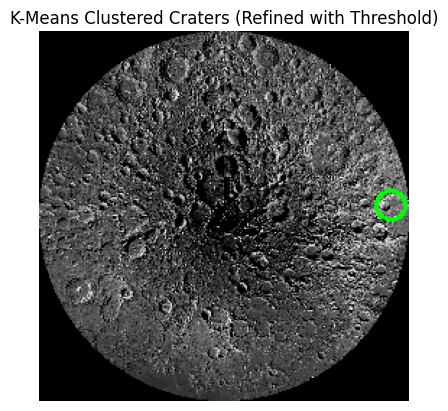

K-Means refined craters image saved.
Classification Report:
              precision    recall  f1-score   support

  Background       0.94      0.99      0.97     61609
     Craters       0.00      0.00      0.00      3927

    accuracy                           0.94     65536
   macro avg       0.47      0.50      0.48     65536
weighted avg       0.88      0.94      0.91     65536

F1 Score: 0.00


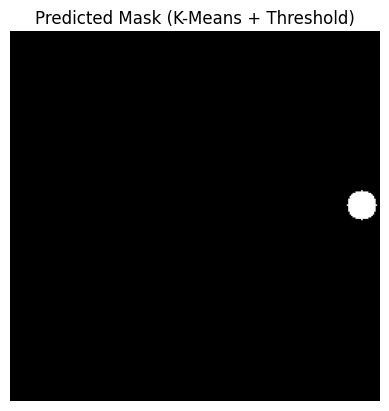

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, f1_score

# Load the moon image
image = cv2.imread('/content/WAC_GLOBAL_P900N0000_064P.PYR.tiff')
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Downsample the image for faster processing
gray_resized = cv2.resize(gray, (256, 256))

# Apply thresholding for initial crater detection
threshold_value = 100
_, binary_craters = cv2.threshold(gray_resized, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Detect contours from the binary mask
contours, _ = cv2.findContours(binary_craters, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract potential crater centers and radii
detected_centers = []
detected_radii = []

for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if 5 < radius < 50:  # Filter based on reasonable crater size
        detected_centers.append([x, y])
        detected_radii.append(radius)

# Bind K-Means with the thresholding-based detection
if detected_centers:
    # Use K-Means clustering on detected crater centers
    kmeans = KMeans(n_clusters=min(len(detected_centers), 5), random_state=42)
    labels = kmeans.fit_predict(detected_centers)
    clustered_centers = kmeans.cluster_centers_

    # Visualize the results of K-Means clustering
    output_image = cv2.resize(image, (256, 256))
    for i, center in enumerate(clustered_centers):
        cv2.circle(output_image, (int(center[0]), int(center[1])), 10, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('K-Means Clustered Craters (Refined with Threshold)')
    plt.axis('off')
    plt.show()

    # Save the clustered result
    cv2.imwrite('/content/kmeans_threshold_craters.png', output_image)
    print("K-Means refined craters image saved.")

# Load ground truth binary mask
ground_truth = cv2.imread('/content/ground_truth_binary_mask.png', cv2.IMREAD_GRAYSCALE)
if ground_truth is None:
    raise ValueError("Ground truth mask not found.")

# Generate predicted binary mask
predicted_mask = np.zeros_like(binary_craters)
for center in clustered_centers:
    cv2.circle(predicted_mask, (int(center[0]), int(center[1])), 10, 255, -1)

# Flatten masks for evaluation
ground_truth_flat = (ground_truth > 0).flatten()
predicted_mask_flat = (predicted_mask > 0).flatten()

# Evaluate the performance: Precision, Recall, and F1-score
report = classification_report(ground_truth_flat, predicted_mask_flat, target_names=['Background', 'Craters'])
f1 = f1_score(ground_truth_flat, predicted_mask_flat)

print("Classification Report:")
print(report)
print(f"F1 Score: {f1:.2f}")

# Save and visualize the predicted mask
cv2.imwrite('/content/kmeans_predicted_mask.png', predicted_mask)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask (K-Means + Threshold)')
plt.axis('off')
plt.show()
